In [10]:
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 19.8 MB/s eta 0:00:0000:0100:01


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [11]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [12]:
import numpy as np
import pandas as pd
import re
import os
for dirname, _, filenames in os.walk('/Users/ragave/Downloads/MCU_Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/ragave/Downloads/MCU_Dataset/Avengers.txt
/Users/ragave/Downloads/MCU_Dataset/Ant-Man.And.The.Wasp.txt
/Users/ragave/Downloads/MCU_Dataset/Avengers.Age.of.Ultron.txt
/Users/ragave/Downloads/MCU_Dataset/Ant-Man.txt
/Users/ragave/Downloads/MCU_Dataset/Captain.Marvel.txt
/Users/ragave/Downloads/MCU_Dataset/Captain.America.Civil.War.txt
/Users/ragave/Downloads/MCU_Dataset/Spider-Man.Homecoming.txt
/Users/ragave/Downloads/MCU_Dataset/Captain.America.The.Winter.Soldier.txt
/Users/ragave/Downloads/MCU_Dataset/Doctor.Strange.txt
/Users/ragave/Downloads/MCU_Dataset/The.Incredible.Hulk.txt
/Users/ragave/Downloads/MCU_Dataset/Spider-Man.Far.From.Home.txt
/Users/ragave/Downloads/MCU_Dataset/Iron-Man.3.txt
/Users/ragave/Downloads/MCU_Dataset/Iron-Man.2.txt
/Users/ragave/Downloads/MCU_Dataset/Guardians.of.the.Galaxy.txt
/Users/ragave/Downloads/MCU_Dataset/Thor.The.Dark.World.txt
/Users/ragave/Downloads/MCU_Dataset/Guardians.of.the.Galaxy.Vol. 2.txt
/Users/ragave/Downloads/MCU_Dataset/Iron-Man

In [13]:
filename_list = os.listdir('/Users/ragave/Downloads/MCU_Dataset/')
movie_list = [movie.replace('.txt','').replace('.',' ').replace('-',' ') for movie in filename_list]
dialogue_list = [open(f'/Users/ragave/Downloads/MCU_Dataset/{files}','r',errors='ignore').readlines() for files in filename_list]
data = {'Filename':filename_list,'Movie Name':movie_list,'Dialogues':dialogue_list}
df = pd.DataFrame(data=data)
df.head(23)

,Filename,Movie Name,Dialogues
0,Avengers.txt,Avengers,"[The Tesseract has awakened.\n, It is on a lit..."
1,Ant-Man.And.The.Wasp.txt,Ant Man And The Wasp,"[I still think about the night\n, your mother ..."
2,Avengers.Age.of.Ultron.txt,Avengers Age of Ultron,"[(DISTANT EXPLOSION)\n, STRUCKER ON PA: Report..."
3,Ant-Man.txt,Ant Man,"[Stark!\n, He doesn't seem happy.\n, Hello, Ha..."
4,Captain.Marvel.txt,Captain Marvel,"[Do you know what time it is?\n, Can't sleep.\..."
5,Captain.America.Civil.War.txt,Captain America Civil War,"[(BUCKY SCREAMING)\n, (CONTINUES SCREAMING)\n,..."
6,Spider-Man.Homecoming.txt,Spider Man Homecoming,"[Things are never gonna be the same now.\n, I ..."
7,Captain.America.The.Winter.Soldier.txt,Captain America The Winter Soldier,"[On your left.\n, On your left.\n, On my left...."
8,Doctor.Strange.txt,Doctor Strange,"[Master Kaecilius.\n, That ritual will bring y..."
9,The.Incredible.Hulk.txt,The Incredible Hulk,"[Is it ready?\n, (SPEAKING PORTUGUESE)\n, Hey!..."


In [14]:
patrn = re.compile('\([A-Z ]*\)')
def filter_dialogue(dia_list):
    dia_list = [lines.replace('\n','') for lines in dia_list]
    mod_list = [patrn.sub('',lines) for lines in dia_list]
    return list(filter(None, mod_list))

In [15]:
df['no of dialogues'] = df['Dialogues'].apply(lambda x: len(x))
df.head(23)

,Filename,Movie Name,Dialogues,no of dialogues
0,Avengers.txt,Avengers,"[The Tesseract has awakened.\n, It is on a lit...",1753
1,Ant-Man.And.The.Wasp.txt,Ant Man And The Wasp,"[I still think about the night\n, your mother ...",1930
2,Avengers.Age.of.Ultron.txt,Avengers Age of Ultron,"[(DISTANT EXPLOSION)\n, STRUCKER ON PA: Report...",2157
3,Ant-Man.txt,Ant Man,"[Stark!\n, He doesn't seem happy.\n, Hello, Ha...",1553
4,Captain.Marvel.txt,Captain Marvel,"[Do you know what time it is?\n, Can't sleep.\...",1424
5,Captain.America.Civil.War.txt,Captain America Civil War,"[(BUCKY SCREAMING)\n, (CONTINUES SCREAMING)\n,...",2105
6,Spider-Man.Homecoming.txt,Spider Man Homecoming,"[Things are never gonna be the same now.\n, I ...",2066
7,Captain.America.The.Winter.Soldier.txt,Captain America The Winter Soldier,"[On your left.\n, On your left.\n, On my left....",1487
8,Doctor.Strange.txt,Doctor Strange,"[Master Kaecilius.\n, That ritual will bring y...",1319
9,The.Incredible.Hulk.txt,The Incredible Hulk,"[Is it ready?\n, (SPEAKING PORTUGUESE)\n, Hey!...",825


In [16]:
df['edited_dialogues'] = df['Dialogues'].apply(lambda x: filter_dialogue(x))
df['no of dialogues_edited'] = df['edited_dialogues'].apply(lambda x: len(x))
df.head(23)

,Filename,Movie Name,Dialogues,no of dialogues,edited_dialogues,no of dialogues_edited
0,Avengers.txt,Avengers,"[The Tesseract has awakened.\n, It is on a lit...",1753,"[The Tesseract has awakened., It is on a littl...",1753
1,Ant-Man.And.The.Wasp.txt,Ant Man And The Wasp,"[I still think about the night\n, your mother ...",1930,"[I still think about the night, your mother an...",1930
2,Avengers.Age.of.Ultron.txt,Avengers Age of Ultron,"[(DISTANT EXPLOSION)\n, STRUCKER ON PA: Report...",2157,[STRUCKER ON PA: Report to your stations immed...,1901
3,Ant-Man.txt,Ant Man,"[Stark!\n, He doesn't seem happy.\n, Hello, Ha...",1553,"[Stark!, He doesn't seem happy., Hello, Hank.,...",1553
4,Captain.Marvel.txt,Captain Marvel,"[Do you know what time it is?\n, Can't sleep.\...",1424,"[Do you know what time it is?, Can't sleep., T...",1424
5,Captain.America.Civil.War.txt,Captain America Civil War,"[(BUCKY SCREAMING)\n, (CONTINUES SCREAMING)\n,...",2105,"[- - , Longing, Rusted, Seventeen, Daybreak, ...",1877
6,Spider-Man.Homecoming.txt,Spider Man Homecoming,"[Things are never gonna be the same now.\n, I ...",2066,"[Things are never gonna be the same now., I me...",2066
7,Captain.America.The.Winter.Soldier.txt,Captain America The Winter Soldier,"[On your left.\n, On your left.\n, On my left....",1487,"[On your left., On your left., On my left. Got...",1487
8,Doctor.Strange.txt,Doctor Strange,"[Master Kaecilius.\n, That ritual will bring y...",1319,"[Master Kaecilius., That ritual will bring you...",1319
9,The.Incredible.Hulk.txt,The Incredible Hulk,"[Is it ready?\n, (SPEAKING PORTUGUESE)\n, Hey!...",825,"[Is it ready?, Hey! That's a great punch., Fe...",673


In [17]:
# import the necessary libraries
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [45]:
# Remove the columns
MCU = df[['Movie Name', 'edited_dialogues']]
MCU

,Movie Name,edited_dialogues
0,Avengers,"[The Tesseract has awakened., It is on a littl..."
1,Ant Man And The Wasp,"[I still think about the night, your mother an..."
2,Avengers Age of Ultron,[STRUCKER ON PA: Report to your stations immed...
3,Ant Man,"[Stark!, He doesn't seem happy., Hello, Hank.,..."
4,Captain Marvel,"[Do you know what time it is?, Can't sleep., T..."
5,Captain America Civil War,"[- - , Longing, Rusted, Seventeen, Daybreak, ..."
6,Spider Man Homecoming,"[Things are never gonna be the same now., I me..."
7,Captain America The Winter Soldier,"[On your left., On your left., On my left. Got..."
8,Doctor Strange,"[Master Kaecilius., That ritual will bring you..."
9,The Incredible Hulk,"[Is it ready?, Hey! That's a great punch., Fe..."


In [19]:
#remove punctuation/lower casing

# Load the regular expression library
import re
# Remove punctuation
MCU['edited_dialogues_processed'] = \
MCU['edited_dialogues'].map(lambda x: re.sub('[,\.!?]', '', str(x)))
# Convert the titles to lowercase
MCU['edited_dialogues_processed'] = \
MCU['edited_dialogues_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
MCU['edited_dialogues_processed'].head()

/var/folders/07/j260f3x91lxby88hm9cgplww0000gn/T/ipykernel_40622/529704686.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MCU['edited_dialogues_processed'] = \
/var/folders/07/j260f3x91lxby88hm9cgplww0000gn/T/ipykernel_40622/529704686.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MCU['edited_dialogues_processed'] = \


0    ['the tesseract has awakened' 'it is on a litt...
1    ['i still think about the night' 'your mother ...
2    ['strucker on pa: report to your stations imme...
3    ['stark' "he doesn't seem happy" 'hello hank' ...
4    ['do you know what time it is' "can't sleep" '...
Name: edited_dialogues_processed, dtype: object

In [20]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [21]:
#prepare data for LDA analysis 
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = MCU.edited_dialogues_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ragave/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['tesseract', 'awakened', 'little', 'world', 'human', 'world', 'would', 'wield', 'power', 'ally', 'knows', 'workings', 'never', 'ready', 'lead', 'force', 'chitauri', 'follow', 'world', 'universe', 'humans', 'burn', 'personnel', 'evacuation', 'order', 'confirmed', 'bad', 'problem', 'sir', 'know']


In [22]:
#tokenize words and clean-up text 
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

MCU_words = list(sent_to_words(MCU))

print(data_words[:1])

[['tesseract', 'awakened', 'little', 'world', 'human', 'world', 'would', 'wield', 'power', 'ally', 'knows', 'workings', 'never', 'ready', 'lead', 'force', 'chitauri', 'follow', 'world', 'universe', 'humans', 'burn', 'personnel', 'evacuation', 'order', 'confirmed', 'bad', 'problem', 'sir', 'know', 'dr', 'selvig', 'read', 'energy', 'surge', 'tesseract', 'four', 'hours', 'ago', 'nasa', 'authorise', 'selvig', 'go', 'test', 'phase', 'testing', 'even', 'room', 'spontaneous', 'event', 'turned', 'energy', 'levels', 'climbing', 'selvig', 'shut', 'ordered', 'evac', 'long', 'get', 'everyone', 'campus', 'clear', 'next', 'half', 'hour', 'better', 'sir', 'evacuation', 'may', 'futile', 'tell', 'go', 'back', 'sleep', 'control', 'tesseract', 'energy', 'may', 'minimum', 'safe', 'distance', 'need', 'make', 'sure', 'phase', 'prototypes', 'shipped', 'sir', 'really', 'priority', 'right', 'time', 'world', 'ends', 'act', 'though', 'intends', 'spin', 'clear', 'tech', 'every', 'piece', 'phase', 'truck', 'gone',

In [23]:
#creating bigram and trigram models
#bigrams - two words frequently occuring together in the document
#trigrams - three words frequently occuring together
#genism's phrases model can build and implement the bigrams, trigrams, quadgrams and more

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['tesseract', 'awakened', 'little', 'world', 'human', 'world', 'would', 'wield', 'power', 'ally', 'knows', 'workings', 'never', 'ready', 'lead', 'force', 'chitauri', 'follow', 'world', 'universe', 'humans', 'burn', 'personnel', 'evacuation', 'order', 'confirmed', 'bad', 'problem', 'sir', 'know', 'dr_selvig', 'read', 'energy', 'surge', 'tesseract', 'four', 'hours', 'ago', 'nasa', 'authorise', 'selvig', 'go', 'test', 'phase', 'testing', 'even', 'room', 'spontaneous', 'event', 'turned', 'energy', 'levels', 'climbing', 'selvig', 'shut', 'ordered', 'evac', 'long', 'get', 'everyone', 'campus', 'clear', 'next', 'half', 'hour', 'better', 'sir', 'evacuation', 'may', 'futile', 'tell', 'go', 'back', 'sleep', 'control', 'tesseract', 'energy', 'may', 'minimum', 'safe', 'distance', 'need', 'make', 'sure', 'phase', 'prototypes', 'shipped', 'sir', 'really', 'priority', 'right', 'time', 'world', 'ends', 'act', 'though', 'intends', 'spin', 'clear', 'tech', 'every', 'piece', 'phase', 'truck', 'gone', 'ye

In [24]:
#remove stopwords, make bigrams and lemmatize 

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [25]:
# spacy for lemmatization
import spacy

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load("en_core_web_sm")

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['tesseract', 'awaken', 'little', 'world', 'human', 'world', 'wield', 'power', 'ally', 'know', 'working', 'never', 'ready', 'lead', 'force', 'universe', 'human', 'burn', 'personnel', 'evacuation', 'order', 'confirm', 'bad', 'problem', 'sir', 'know', 'read', 'energy', 'surge', 'tesseract', 'hour', 'ago', 'authorise', 'go', 'test', 'phase', 'testing', 'even', 'room', 'spontaneous', 'event', 'turn', 'energy', 'level', 'climb', 'selvig', 'shut', 'order', 'evac', 'long', 'get', 'campus', 'clear', 'next', 'half', 'hour', 'well', 'sir', 'evacuation', 'futile', 'go', 'back', 'sleep', 'control', 'tesseract', 'energy', 'minimum', 'safe', 'distance', 'make', 'sure', 'phase', 'prototype', 'ship', 'sir', 'really', 'priority', 'right', 'time', 'world', 'end', 'act', 'intend', 'spin', 'clear', 'tech', 'piece', 'phase', 'truck', 'go', 'sir', 'talk', 'doctor', 'director', 'know', 'certain', 'tesseract', 'misbehaving', 'suppose', 'funny', 'funny', 'tesseract', 'active', 'behaving', 'assume', 'pull', 'e

In [26]:
#create the dictionary and corpus needed for topic modelling
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

#gensim creates a unique id for each word in the document 
#the produced corpus shown is a mappibg of (word_id, word_frequency)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 5), (17, 1), (18, 1), (19, 3), (20, 1), (21, 9), (22, 1), (23, 1), (24, 1), (25, 3), (26, 1), (27, 2), (28, 3), (29, 2), (30, 5), (31, 2), (32, 3), (33, 1), (34, 1), (35, 5), (36, 1), (37, 1), (38, 1), (39, 1), (40, 5), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 2), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 3), (53, 1), (54, 1), (55, 1), (56, 3), (57, 1), (58, 5), (59, 2), (60, 1), (61, 1), (62, 5), (63, 2), (64, 1), (65, 7), (66, 2), (67, 4), (68, 1), (69, 3), (70, 2), (71, 1), (72, 3), (73, 1), (74, 10), (75, 3), (76, 2), (77, 1), (78, 1), (79, 7), (80, 1), (81, 1), (82, 2), (83, 15), (84, 6), (85, 2), (86, 1), (87, 1), (88, 2), (89, 12), (90, 2), (91, 1), (92, 2), (93, 5), (94, 3), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 4), (101, 1), (102, 2), (103, 1), (104, 1), (105, 2), (106, 1), (107, 3), (108, 1), (109, 1), (110,

# LDA model training 

In [27]:
#alpha and eta are hyperparameters that affect sparsity of the topics 
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [28]:
#view the topics in LDA model
#the above LDA model is built with 20 different topics where each topic is
# a combination of keywords and each keyword contributes a certain weightage
# to the topic

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.001*"go" + 0.001*"get" + 0.001*"know" + 0.001*"think" + 0.001*"say" + '
  '0.001*"right" + 0.001*"come" + 0.001*"want" + 0.001*"take" + 0.001*"look"'),
 (1,
  '0.001*"go" + 0.001*"know" + 0.001*"get" + 0.001*"come" + 0.001*"right" + '
  '0.001*"time" + 0.000*"take" + 0.000*"tell" + 0.000*"think" + 0.000*"good"'),
 (2,
  '0.001*"go" + 0.001*"get" + 0.001*"know" + 0.001*"good" + 0.000*"come" + '
  '0.000*"see" + 0.000*"think" + 0.000*"right" + 0.000*"time" + 0.000*"take"'),
 (3,
  '0.027*"go" + 0.023*"get" + 0.018*"know" + 0.011*"right" + 0.011*"come" + '
  '0.010*"think" + 0.009*"see" + 0.008*"take" + 0.008*"look" + 0.008*"want"'),
 (4,
  '0.002*"go" + 0.002*"get" + 0.002*"know" + 0.001*"come" + 0.001*"see" + '
  '0.001*"right" + 0.001*"take" + 0.001*"want" + 0.001*"think" + 0.001*"well"'),
 (5,
  '0.046*"ultron" + 0.029*"stark" + 0.013*"romanoff" + 0.013*"roger" + '
  '0.013*"strucker" + 0.011*"banner" + 0.011*"thor" + 0.009*"sceptre" + '
  '0.009*"avenger" + 0.009*"go"'),
 (

In [29]:
#compute model perlexity and coherence score
#model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.447491538244773

Coherence Score:  0.27708916922684124


In [30]:
#visualize the topics-keywords

# Visualize the topics
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentat

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.197324 -0.008046       1        1  85.499638
13     0.262420 -0.028480       2        1   7.716705
15     0.259749  0.050716       3        1   5.275180
5     -0.007493 -0.177070       4        1   0.761061
10     0.003795  0.046684       5        1   0.449445
14    -0.032689  0.030669       6        1   0.289370
11    -0.014466  0.000593       7        1   0.000653
4     -0.036294  0.002752       8        1   0.000622
19    -0.035936  0.004932       9        1   0.000620
12    -0.027899  0.004548      10        1   0.000619
7     -0.048795  0.005479      11        1   0.000609
0     -0.049811  0.007043      12        1   0.000609
18    -0.050123  0.006105      13        1   0.000609
6     -0.050674  0.006945      14        1   0.000609
16    -0.052578  0.006479      15        1   0.000609
17    -0.059077  0.007632      16        1   0.000609
8     -0.060229  0.007384      17        1   0.000608
1     -0.064295  0.008354      18        1   0.000608
2     -0.063511  0.008193      19        1   0.000608
9     -0.069418  0.009087      20        1   0.000608, topic_info=       Term         Freq        Total Category  logprob  loglift
507      go  1884.000000  1884.000000  Default  30.0000  30.0000
499     get  1599.000000  1599.000000  Default  29.0000  29.0000
630    know  1273.000000  1273.000000  Default  28.0000  28.0000
974   right   773.000000   773.000000  Default  27.0000  27.0000
229    come   807.000000   807.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
541    help     0.000119   268.535568  Topic20  -8.2497  -2.6153
764    need     0.000126   496.733984  Topic20  -8.1931  -3.1737
693     man     0.000121   383.204713  Topic20  -8.2364  -2.9575
1290   wait     0.000112   233.363855  Topic20  -8.3114  -2.5366
1326   work     0.000113   310.266316  Topic20  -8.3025  -2.8125

[1335 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1967      4  0.704948  accomplish
5993      1  0.237416      aether
5993      2  0.771603      aether
4419      2  0.972582    agamotto
21        1  0.984240       agent
...     ...       ...         ...
1329      4  0.007918       world
6389      3  0.964962      xandar
5991      1  0.028877       yondu
5991      3  0.981830       yondu
2543      4  0.988782      zrinka

[647 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 14, 16, 6, 11, 15, 12, 5, 20, 13, 8, 1, 19, 7, 17, 18, 9, 2, 3, 10])

In [31]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [32]:
num_topics = 20
get_lda_topics(lda_model, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,Topic # 11,Topic # 12,Topic # 13,Topic # 14,Topic # 15,Topic # 16,Topic # 17,Topic # 18,Topic # 19,Topic # 20
0,go,go,go,go,go,ultron,go,go,get,go,soldier,get,get,come,shield,go,go,get,get,go
1,get,know,get,get,get,stark,know,know,go,get,go,go,go,know,launch,get,get,go,go,get
2,know,get,know,know,know,romanoff,get,get,know,know,general,know,know,go,helicarrier,know,know,know,right,know
3,think,come,good,right,come,roger,right,come,take,come,move,think,come,see,insight,say,right,look,come,come
4,say,right,come,come,see,strucker,think,say,think,right,blonsky,right,right,world,hostage,quill,want,come,know,take
5,right,time,see,think,right,banner,take,see,come,see,know,come,think,time,project_insight,groot,come,right,see,see
6,come,take,think,see,take,thor,see,think,right,good,commando,well,see,asgard,order,tell,think,say,good,want
7,want,tell,right,take,want,sceptre,say,right,say,want,radio,good,take,take,batroc,kill,see,think,think,time
8,take,think,time,look,think,avenger,need,time,make,well,get,want,tell,jane,know,want,back,good,time,think
9,look,good,take,want,well,go,come,want,look,take,wait,say,say,get,pirate,yondu,tell,see,take,well


# NMF

In [33]:
# Importing Necessary packages

import pandas as pd;
import numpy as np;
import scipy as sp;
import sklearn;
import sys;
from nltk.corpus import stopwords;
import nltk;
from gensim.models import ldamodel
import gensim.corpora;
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;
import pickle;

In [34]:
# NMF requires a design matrix 
#apply Tfldf transformation to the counts
 
#the count vectorizer module needs string inputs, not array, so I join them with a space. This is a very quick operation.
MCU_dialogues = [' '.join(text) for text in texts]

In [35]:
# counts design matrix using SKLearn's CountVectorizer module 
#return = a matrix of size (Documents x Features), where the value of a cell is going to be the number of times the feature (word)
# appears in the documents
#to reduce the size of the matrix maximum feature size is set to 5000 

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(MCU_dialogues);

In [36]:
#set a Tfldf Transformer, and transform the counts with the model

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

In [37]:
#normalize the Tfldf values to unit length for each row

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

In [38]:
#obtain a NMF model and fit it with the sentences

#obtain a NMF model.
model = NMF(n_components=num_topics, init='nndsvd');
#fit the model
model.fit(xtfidf_norm)

NMF(init='nndsvd', n_components=20)

In [39]:
#generate NMF topics
#iterate over each topic, obtain the most important scoring words in each cluster, and add them to a df

def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [40]:
#call the function and obtain the topics
get_nmf_topics(model, 20)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,Topic # 11,Topic # 12,Topic # 13,Topic # 14,Topic # 15,Topic # 16,Topic # 17,Topic # 18,Topic # 19,Topic # 20
0,go,jane,yondu,ver,dormammu,go,king,ultron,stone,get,asgard,know,go,jane,orb,get,go,go,get,go
1,get,sea_bass,go,skrull,kamar_taj,get,go,go,go,go,go,go,get,thor,get,go,get,get,tesseract,tony
2,know,asgard,groot,get,dark_dimension,blonsky,vibranium,get,get,know,get,get,know,go,go,know,liz,tony,know,get
3,lab,aether,quill,know,strange,know,get,stark,know,ant,grandmaster,want,drone,asgard,quill,think,know,know,go,mandarin
4,scotty,go,get,go,come,soldier,wakanda,know,thano,right,know,shield,mj,frost_giant,ronan,schmidt,right,right,think,know
5,daddy,know,know,mar_vell,ancient,commando,tribe,come,time,man,hulk,think,see,come,groot,man,come,make,need,right
6,come,come,rocket,see,world,general,take,right,right,darren,odin,launch,come,king,yondu,hitler,guy,take,cube,say
7,right,convergence,drax,come,time,want,come,strucker,come,yellowjacket,thor,say,right,heimdall,know,come,ned,well,well,killian
8,think,malekith,battery,back,doctor,antidote,challenge,thor,think,guy,see,take,think,know,ravager,good,thing,want,want,think
9,janet,see,say,find,know,back,right,roger,back,daddy,back,roger,fury,take,rocket,take,look,think,come,come


# CorEX

In [41]:
import numpy as np
import scipy.sparse as ss
import matplotlib.pyplot as plt

!pip install corextopic
!pip install networkx
import corextopic.corextopic as ct
import corextopic.vis_topic as vt # jupyter notebooks will complain matplotlib is being loaded twice

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [55]:
CorEX_MCU = MCU[['edited_dialogues']]

In [63]:
# Transform 20 newsgroup data into a sparse matrix
vectorizer = CountVectorizer(stop_words='english', max_features=20000, binary=True)
doc_word = vectorizer.fit_transform(data)
doc_word = ss.csr_matrix(doc_word)

doc_word.shape # n_docs x m_words

#the doc-word matrix is 23 document by 11,025 words. 

(23, 11025)

In [64]:
#getting the words that label the columns 
#needed for outputting readable topics and later for anchoring 

# Get words that label the columns (needed to extract readable topics and make anchoring easier)
words = list(np.asarray(vectorizer.get_feature_names()))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [65]:
#removing all integers from the set of words
not_digit_inds = [ind for ind,word in enumerate(words) if not word.isdigit()]
doc_word = doc_word[:,not_digit_inds]
words    = [word for ind,word in enumerate(words) if not word.isdigit()]

doc_word.shape # n_docs x m_words

#brings it down to 10,883 words 

(23, 10883)

In [66]:
#train a topic model with 50 topics
# Train the CorEx topic model with 50 topics
topic_model = ct.Corex(n_hidden=50, words=words, max_iter=200, verbose=False, seed=1)
topic_model.fit(doc_word, words=words);

In [67]:
# Print a single topic from CorEx topic model
topic_model.get_topics(topic=1, n_words=10)

#the topic words are those with the highest mutual information with the topic, rather than those with highest probability
# within the topic as in LDA
#-1 sign means the absence of a word is informative in that topic, rather than its presence

[('visual', 0.40165365562306565, 1.0),
 ('allow', 0.36500719238365176, -1.0),
 ('missions', 0.35216457604999585, 1.0),
 ('bogey', 0.2970087873604391, 1.0),
 ('operation', 0.2970087873604391, 1.0),
 ('chief', 0.2970087873604391, 1.0),
 ('brought', 0.29700878736043473, -1.0),
 ('blood', 0.29700878736043473, -1.0),
 ('early', 0.25872472890501835, 1.0),
 ('covering', 0.24388661953283114, 1.0)]

In [68]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: panels, erik, fortune, urgent, blind, expect, feels, beautiful, shadows, cats
1: visual, allow, missions, bogey, operation, chief, brought, blood, early, covering
2: nervous, key, lay, engage, practical, electromagnetic, formation, meat, sun, keeps
3: rhodes, double, lieutenant, bow, cleared, arrest, mission, lightning, file, colonel
4: surprise, recruit, responsible, streets, funny, heroes, private, notes, recognition, pizza
5: leader, appreciate, happy, equipment, helmet, expected, prevent, brothers, guide, wears
6: lesson, express, tap, understood, wormhole, opinion, disgusting, robots, dick, owe
7: meeting, em, returns, exists, society, evolution, knees, short, heart, complicated
8: gotten, worry, events, learning, junk, searching, imagined, rightful, federal, drew
9: status, price, basically, perfectly, brilliant, convinced, dramatic, jewel, yup, program
10: iron, tony, stark, pepper, level, connection, potts, jet, girlfriend, mouth
11: atmosphere, ones, satellites, journey, si

In [69]:
#document labels 
#documents are sorted according to log probabilities which is why the highest probability documents have a score of 0
# and other documents have negative scores

# Print a single topic from CorEx topic model
topic_model.get_top_docs(topic=0, n_docs=10, sort_by='log_prob')

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


[(0, 0.0),
 (19, 0.0),
 (14, 0.0),
 (6, 0.0),
 (5, 0.0),
 (11, 0.0),
 (22, 0.0),
 (1, -366.6466452979777),
 (9, -367.32143931968403),
 (17, -374.89661629698753)]

In [70]:
#CorEx estimates the probability a document belongs to a topic given that document's words
#the probabilities across topics for a given document do not have to add up to 1 
#estimates probabilities of topics for each document 

print(topic_model.p_y_given_x.shape) # n_docs x k_topics

(23, 50)


In [71]:
#Total correlation and model selection 
#overall TC - the measure which CorEx maximize when constructing the topic model

topic_model.tc

901.7491739091599

In [72]:
#topic TC
#the overall total correlation is the sum of the total correlation per each topic 

topic_model.tcs.shape # k_topics

(50,)

In [73]:
print(np.sum(topic_model.tcs))
print(topic_model.tc)

901.7491739091599
901.7491739091599


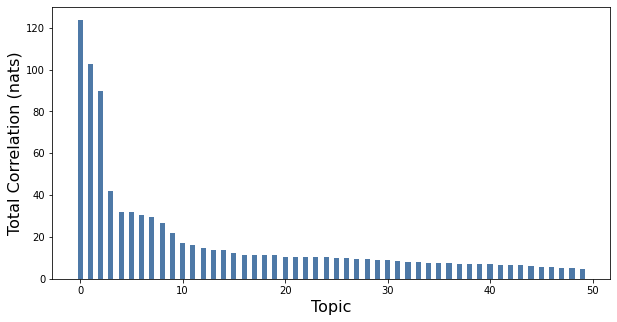

In [74]:
#selecting the number of topics 
#choose the number of topics by observing the distribution of TCs for each topic to see how much each additional
# topic contributes to the overall TC

plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

#the first topic is much more informative than the other topcs 
#topics up until 2 are the most informative 

In [75]:
#pointwise document TC 
#decomposing total correlation further
#the topic correlation is the average of the pointwise total correlations for each individual document
topic_model.log_z.shape # n_docs x k_topics

(23, 50)

In [76]:
print(np.mean(topic_model.log_z, axis=0))
print(topic_model.tcs)

#pointwise total correlations in log_z represent the correlations within an individual document explained by a particular topic
#these correlations have been used to measure how "surprising" documents are with respect to given topics

[123.69852793 102.80336756  89.63365817  42.14256774  31.92577951
  31.89860413  30.52183032  29.41872149  26.76210336  22.07624575
  17.32909571  16.2394868   14.8063871   13.70315793  13.70151
  12.36372844  11.44554585  11.3868799   11.37074338  11.25689839
  10.56257144  10.44994322  10.44275475  10.42096265  10.31609872
  10.10255529   9.76002782   9.68341579   9.36564779   8.98767566
   8.83358976   8.410893     8.14283572   7.93999103   7.73632445
   7.70026045   7.69516795   7.26465613   7.14585666   7.070404
   6.84873094   6.80389701   6.63927806   6.43758186   6.18247261
   5.75535829   5.69625477   5.19094504   5.01257722   4.66560638]
[123.69852793 102.80336756  89.63365817  42.14256774  31.92577951
  31.89860413  30.52183032  29.41872149  26.76210336  22.07624575
  17.32909571  16.2394868   14.8063871   13.70315793  13.70151
  12.36372844  11.44554585  11.3868799   11.37074338  11.25689839
  10.56257144  10.44994322  10.44275475  10.42096265  10.31609872
  10.10255529   9

In [77]:
#hierarchical topic models
# Train a second layer to the topic model
tm_layer2 = ct.Corex(n_hidden=10)
tm_layer2.fit(topic_model.labels);

# Train a third layer to the topic model
tm_layer3 = ct.Corex(n_hidden=1)
tm_layer3.fit(tm_layer2.labels);

# BTM